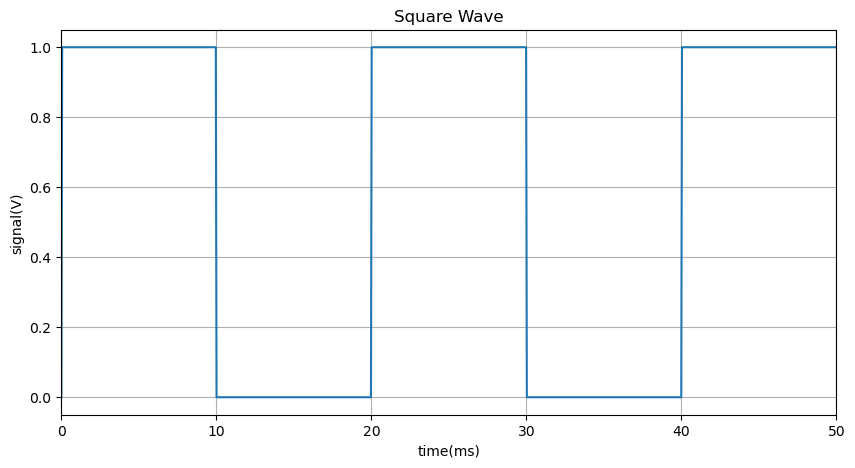

In [1]:
%matplotlib inline
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
#
# Setup an input square wave signal.
#
F = 50.                 # Frequency of the square wave.
T = .05                 # Amount of time to simulate
N = 2**10                # Number of time steps. Choose small to see a difference between the methods.
DT = T/N                # Delta T
indexes = range(N)
t = np.array([i*DT for i in indexes]) # Array containing the desired time steps.

def square_wave(ti,A,F):             
    # Define a function for the square wave.
    # input ti = current time
    # input A  = Amplitude
    # input F  = Frequency.
    # The following is a bit tricky: If you look at t*2*F, then for the first half of the square
    # wave, this will give numbers between 0 and 1, and for the second half, between 1 and 2. The 'int' of
    # that number will be 0 for the first half, 1 for the second, 2 for the third etc. So then the remainder
    # when dividing those integer by 2 will give 0,0,0,...,1,1,1..., etc in exactly the pattern we want.
    return(A*(1-np.array(ti*2*F,dtype="int")%2))

Vin   = square_wave(t,1,F) # 0.5+0.5*signal.square(2*np.pi*F*t) # Create a square wave wiht a 2 Volt peak to peak (-1V to +1V)
Vin[0]= 0                         # We must start at 0!!!!
plt.figure(figsize=(10,5))
plt.plot(1000*t,Vin )             # Change the x-axis scale to ms by multiplying by 10^3
ax = plt.gca()
ax.set_xlim(0.,50.)               # Show only the first 50 ms of the signal
plt.grid(True)
plt.title("Square Wave")
plt.xlabel("time(ms)",position=(0.95,1))
plt.ylabel("signal(V)",position=(1,0.9))
plt.show()